In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
test=pd.read_csv("Test_People.csv")

In [57]:
train=pd.read_csv("Train_People.csv")

In [5]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
train.shape, test.shape

((31647, 18), (13564, 17))

## predict if the client will subscribe to term deposit.

### Dependent variable: subscribe and independent variable: all left over


In [7]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

## Univariate Analysis

### Categorical variable: job,marital,education,default,housing,loan,contact,month,poutcome,subscribed

(<AxesSubplot:>,
 blue-collar      6842
 management       6639
 technician       5307
 admin.           3631
 services         2903
 retired          1574
 self-employed    1123
 entrepreneur     1008
 unemployed        905
 housemaid         874
 student           635
 unknown           206
 Name: job, dtype: int64)

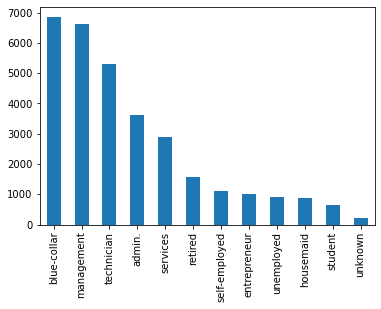

In [14]:
train['job'].value_counts().plot(kind='bar'),train['job'].value_counts()

(<AxesSubplot:>,
 no     27932
 yes     3715
 Name: subscribed, dtype: int64)

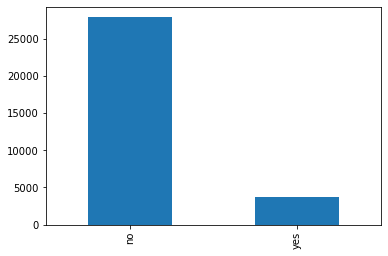

In [13]:
train['subscribed'].value_counts().plot.bar(),train['subscribed'].value_counts()

Age of the client


<AxesSubplot:xlabel='age', ylabel='Count'>

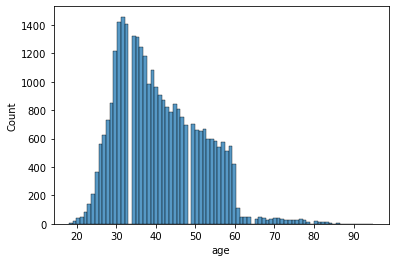

In [26]:
print('Age of the client')
sb.histplot(train["age"])

(<AxesSubplot:>,
 married     19095
 single       8922
 divorced     3630
 Name: marital, dtype: int64)

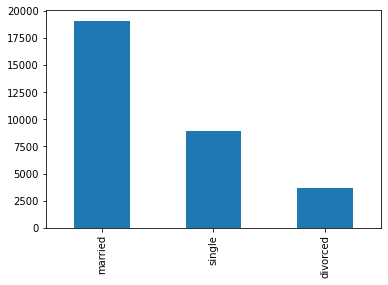

In [15]:
train['marital'].value_counts().plot.bar(),train['marital'].value_counts()

(<AxesSubplot:>,
 secondary    16224
 tertiary      9301
 primary       4808
 unknown       1314
 Name: education, dtype: int64)

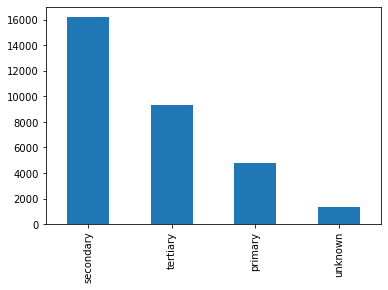

In [17]:
train['education'].value_counts().plot.bar(),train['education'].value_counts()

(<AxesSubplot:>,
 no     31062
 yes      585
 Name: default, dtype: int64)

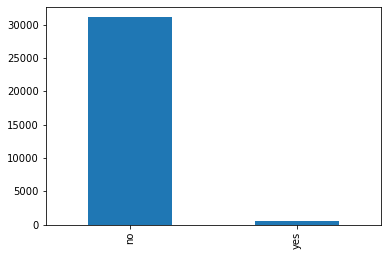

In [18]:
train['default'].value_counts().plot.bar(),train['default'].value_counts()

(yes    17584
 no     14063
 Name: housing, dtype: int64,
 <AxesSubplot:>)

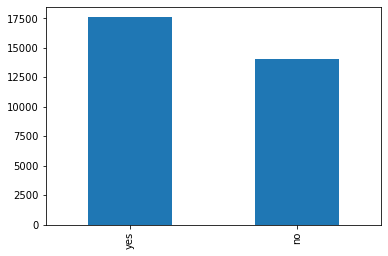

In [19]:
train['housing'].value_counts(),train['housing'].value_counts().plot.bar()

(no     26516
 yes     5131
 Name: loan, dtype: int64,
 <AxesSubplot:>)

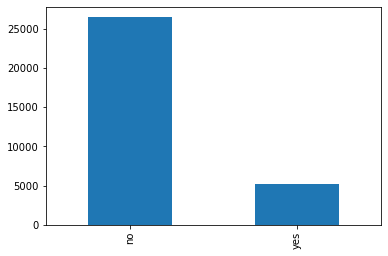

In [20]:
train['loan'].value_counts(),train['loan'].value_counts().plot.bar()

## Bivariate Analysis

### Now we will convert all categorical variables into number



#### This will help us to find the correlation even between the categorical variables.

#### ONLY 2 CATEGORIES

In [58]:
Num={"default":{"yes": 1, "no": 0}, "housing":{"yes": 1, "no": 0},"loan":{"yes": 1, "no": 0},
     "subscribed":{"yes": 1, "no": 0}}

In [59]:
train = train.replace(Num)
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,0,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,0,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,0,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,0,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,0,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0


#### MORE THAN TWO CATEGORIES

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

poutcome = le.fit_transform(train['poutcome'])
print(poutcome)
train['poutcome'] = poutcome

marital = le.fit_transform(train['marital'])
print(marital)
train['marital'] = marital

month = le.fit_transform(train['month'])
print(month)
train['month'] = month

contact = le.fit_transform(train['contact'])
print(contact)
train['contact'] = contact

job = le.fit_transform(train['job'])
print(job)
train['job'] =job

education = le.fit_transform(train['education'])
print(education)
train['education'] = education

[3 3 3 ... 3 0 3]
[1 1 1 ... 2 1 0]
[9 5 5 ... 1 8 5]
[1 0 0 ... 0 1 0]
[ 0 11  7 ...  4  9  4]
[3 1 1 ... 2 1 1]


In [39]:
train.head()    

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [40]:
#now all the object datatype is converted to int
train.dtypes

ID            int64
age           int64
job           int32
marital       int32
education     int32
default       int64
balance       int64
housing       int64
loan          int64
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int64
dtype: object

In [41]:
# 734 out of 31625 are outliers
train.isnull().sum()#no null values

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

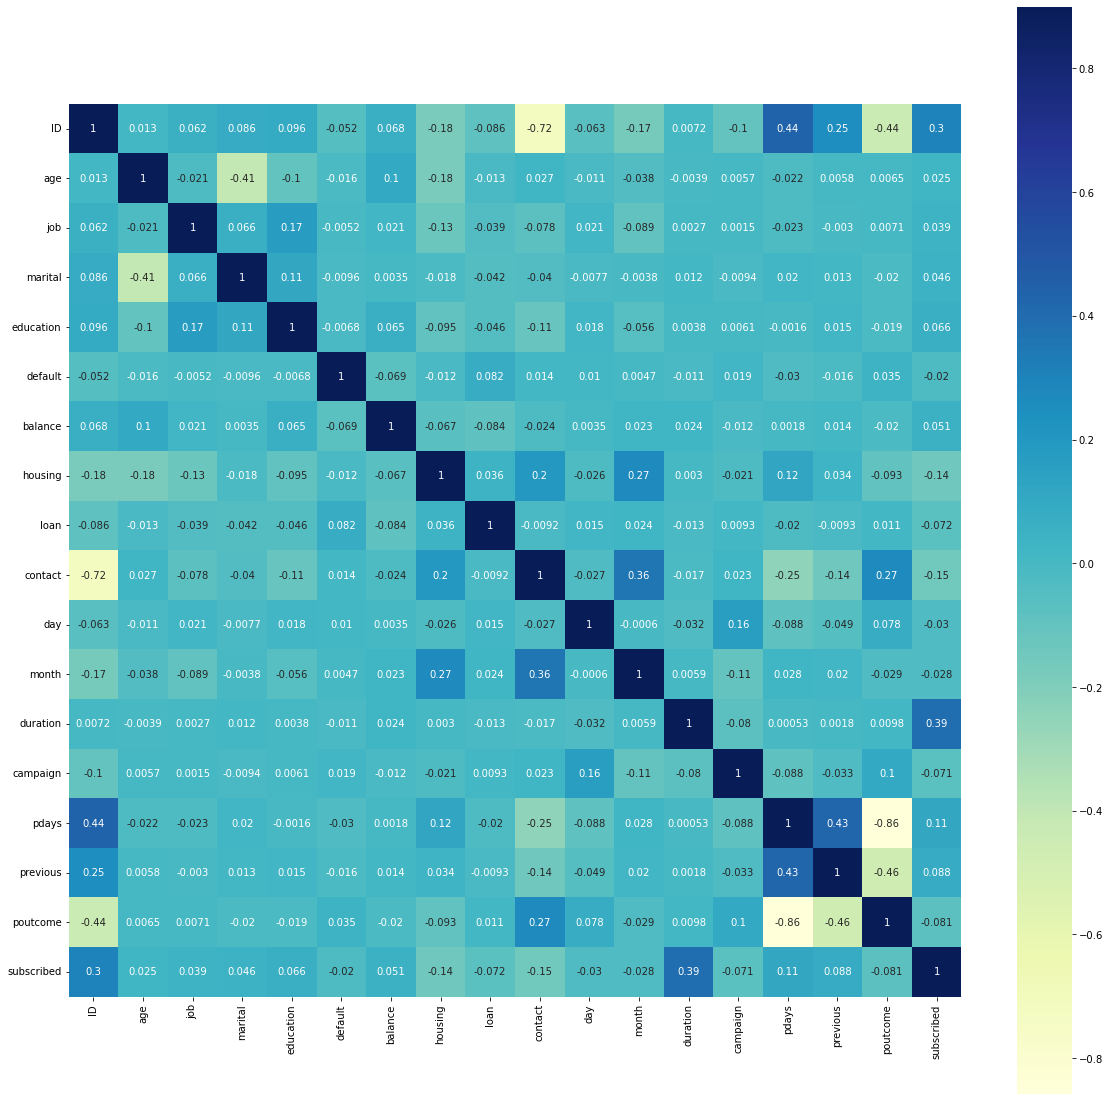

In [51]:
corr = train.corr()
fig = plt.figure(figsize=(20,20))
sb.heatmap(corr,vmax=.9, square=True,annot=True, cmap="YlGnBu")

#### We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

In [49]:
train.shape

(31647, 18)

## Model Building

In [61]:
target = train['subscribed']
train = train.drop('subscribed',1)

C:\Users\SUWARNA\AppData\Local\Temp/ipykernel_48204/461833753.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train = train.drop('subscribed',1)


Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set.

In [62]:
from sklearn.model_selection import train_test_split

# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

#### Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lreg = LogisticRegression()

In [66]:
lreg.fit(X_train,y_train)

C:\Users\SUWARNA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_val, prediction)

0.8854660347551343

## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [72]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [73]:
predict = clf.predict(X_val)

In [74]:
accuracy_score(y_val, predict)

0.9033175355450237

#### From decision tree we get 90.33% acurate model so we will proceed with it

### We have completed our validation and now we will use this model to predict the values of subscription of test data

In [79]:
Num={"default":{"yes": 1, "no": 0}, "housing":{"yes": 1, "no": 0},"loan":{"yes": 1, "no": 0}}

test = test.replace(Num)
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3


In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

poutcome = le.fit_transform(test['poutcome'])
print(poutcome)
test['poutcome'] = poutcome

marital = le.fit_transform(test['marital'])
print(marital)
test['marital'] = marital

month = le.fit_transform(test['month'])
print(month)
test['month'] = month

contact = le.fit_transform(test['contact'])
print(contact)
test['contact'] = contact

job = le.fit_transform(test['job'])
print(job)
test['job'] =job

education = le.fit_transform(test['education'])
print(education)
test['education'] = education

[3 3 3 ... 3 2 0]
[1 0 2 ... 1 2 1]
[8 5 8 ... 4 9 8]
[0 1 2 ... 0 0 0]
[7 5 6 ... 5 0 0]
[1 0 2 ... 0 1 1]


In [81]:
test_prediction = clf.predict(test)

### Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [82]:
submission = pd.DataFrame()

In [83]:
# creating a Prediction_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [84]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

#Again converted 1 to yes and 0 to no

submission.to_csv('submission.csv', header=True, index=False)


In [86]:
submission= pd.read_csv("submission.csv")

In [87]:
pwd

'C:\\Users\\SUWARNA'